#Gradient Symbolic Computation  

##Paul Smolensky and Matt Goldrick
> ### <em>with the essential help of</em>  

##Nicholas Becker and Pyeong Whan Cho
###LSA 2015 Summer Linguistic Institute, University of Chicago

<font; color="red">
# Class 3 (Monday, July 13, 2015) 
# GSC Implementation in Local Neural Networks

In this class we take the first step towards defining the neural network architecture that undergirds GSC.

A **neural network** ${\cal N}$ is a mathematical object defined by: 

1. a set of $N$ 'units'; 

2. a set of $N^2$ 'connections', one from each unit to each other unit;

the **state** of ${\cal N}$ at a given time $t$ consists in

3. a particular *activation state* ${\bf a}(t)$: for each unit, labeled $\beta$, an 'activation level' $a_\beta(t)$ in some set of possible activation values $\frak A$; the *activation* **__vector__** ${\bf a}(t)$ is the ordered list of all activation levels ${\bf a}(t) \equiv (a_1(t),\ a_2(t),\ ...,\ a_N(t))$;

4. a particular *connection-weight state* ${\bf W}(t)$: for each connection, between the units labelled $\beta$ and $\gamma$, a 'connection weight' $w_{\beta \gamma}(t)$; ${\bf W}(t)$ is the 2-D, $N {\sf x} N$, array or **matrix** in which $w_{\beta \gamma}(t)$ is the number in the cell located in row $\beta$, column $\gamma$;

the **dynamics** of ${\cal N}$ consists in

5. an *activation dynamics*, an equation that dictates how the activation state of the network ${\bf a}(t)$ evolves over time $t$;

6. a *learning dynamics*, an equation that dictates how the connection weights state of the network ${\bf W}(t)$ evolves over time $t$; we will not take up this aspect of GSC networks until Class 6)

We  will not take up the activation dynamics of GSC networks until Class 6; we will not consider the learning dynamics of GSC networks in this course.

Typically, the set of possible activation levels is the entire real number line $(\frak A = ℝ)$ or a subsegment such as the interval between 0 and 1, inclusive $(\frak A = [0,\ 1])$: this is a *continuous* neural network, which we will consider shortly. 
For the moment, we consider a *discrete* (indeed, a binary) neural network in which ${\frak A} = \{0, 1\}$. 

Until we take up the activation dynamics in Class 6, our concern is with: 

1. How the network activation pattern at some moment, ${\bf a^{\frak R}}$, encodes a Gradient Symbolic Representation (GSR) ${\frak R}$, and 

2. Given a weight matrix ${\bf W}_{\cal G}$ that encodes a Harmonic Grammar ${\cal G}$ in a network ${\cal N_G}$, how the Network Harmony of the activation pattern ${\bf a^{\frak R}}$, $H_{\cal N_G}\left({\bf a^{\frak R}}\right)$ is defined, so that it equals the Harmonic Grammar $H_{\cal G}$'s Harmony value $H_{\cal G}({\frak R})$ of the GSR ${\frak R}$ that is encoded by ${\bf a^{\frak R}}$:

$$ H_{\cal N_G} \left( {\bf a^{\frak R}} \right) = H_{\cal G}({\frak R})$$

In this class we consider networks in which the activity of each possible filler/role binding in a Gradient Symbol Structure is encoded as the activation level of a single network unit -- "local representation".$^*$

> $^*$ In Class 5 we take up the general GSC architecture, which uses *distributed representations*, in which the activity of a filler/role binding is encoded by the strength of an activation pattern across many network units that also simultaneously host (through a superposition of activation patterns) the encoding of the activity of many different filler/role bindings.

We begin by continuing the example of Harmonic Context-Free Grammars (HCFGs), then introduce a new example of phonological alternation, Devoicing. 

<font; color="blue">
##Recall from Class 1: From a Context-Free rewrite-rule Grammar to a Context-Free Harmonic Grammar in Harmonic Normal Form

Recall: how to specify exactly the trees generated by a given HNF grammar (or the language $\cal{L}$ of their terminal strings) using a Harmonic Grammar?
<img src="../class-1_6-july/class-1_images/Item_10-3.png" style="width: 800px;">
<img src="../class-1_6-july/class-1_images/Fig_10-1.png" style="width: 800px;">
<img src="../class-1_6-july/class-1_images/Item_10-4.png" style="width: 800px;">

For the proof, see THM vol. 1 pp. 397-398. For the intuition, see the picture in Fig. 2.

<img src="../class-1_6-july/class-1_images/Fig_10-2.jpg" style="width: 800px;">

<font; color="purple">
##An example network 

Consider the simple grammar ${\cal G}_0$ introduced in Class 1 (the default grammar of the course):

> ${\cal G}_0: {\tt \ S[1] \rightarrow A \ A; \ \ S[2] \rightarrow B \ B }$

Here we've adopted the further simplification of ${\cal G}_0$ in which we have dropped ${\tt S \ \rightarrow S[1] \ | \ S[2]}$; instead, both ${\tt S[1]}$ and ${\tt S[2]}$ are considered start symbols: grammatically eligible to label the tree root node.

In a GSC neural network, as in most neural networks, the spatial arrangement of network units is irrelevant to the network's functioning: all that matters is the strength of the connections between units. 
For ease of interpreting network states, however, we can choose to lay the units out spatially as in the following Figure 3-1:

###Figure 3-1
<img src="class-3_images/Fig_3-1.png" style="width: 800px;">

A Gradient Symbolic Representation ${\frak R}$ is encoded by a state ${\bf a}$ of this network in which the unit labelled $k/j$ has an activation level $a_{k/j}$ that equals the activity in $R$ of the particular filler/role binding ${\tt f}_k/r_j$
The three pools of units are arranged spatially by the roles, with the role of root-position ($r_{\text r}$) at the top, and the left- ($r_{\text 0r}$) and right-child-of-root ($r_{\text 1r}$) roles at the lower left- and right, respectively. In each pool there are four units, one for each of the symbols in the alphabet ${cal A} \equiv \{ {\tt S[1], S[2], A, B} \}$. In the IPython implementation, the filler/role bindings corresponding to the units shown in gray rather than black are actually absent: they are never active in any grammatical tree.

The tree [𝚂[𝟷] 𝙰 𝙰] i.e. 𝚃𝚛𝚎𝚎(′𝚂[𝟷] (𝙰 𝙰)′) is encoded by the vector (1 0, 1 0, 1 0) -- assuming the gray units are not present. 
What is its Harmony?

¿ How should Figure 3-1 be ammended in order to encode the full HNF grammar 

$${\cal G}_0 :\ {\tt S \rightarrow S[1]\ |\ S[2];\ S[1]\ \rightarrow\ A\ A;\ S[2]\ \rightarrow\ B\ B}$$

In [11]:
%run ../../code/grammar
def printAllRules(gram):
    print('CNF:\n' + gram.cnfRulesToString() + '\n')
    print('HNF:\n' + gram.hnfRulesToString() + '\n')
    print('HG rules:\n' + gram.hgRulesToString() + '\n')
#gram0 = Grammar('S1 -> A A; S2 -> B B')
gram0 = Grammar('S[1] -> A A; S[2] -> B B', isHnf=True)
printAllRules(gram0)
H1 = gram0.getHarmony('S (S[1] (A A))')
print("H_G0(S (S[1] (A A))) =", H1)
H2 = gram0.getHarmony('S (S[2] (B B))')
print("H_G0(S (S[2] (B B))) =", H2)
H3 = gram0.getHarmony('S (S[2] (B A))')
print("H_G0(S (S[2] (B A))) =", H3)


CNF:
{S -> A A; 
 S -> B B}

HNF:
{S[1] -> A A; 
 S[2] -> B B}

HG rules:
{[(S[1]/r, A/0r), 2];
 [(S[1]/r, A/1r), 2];
 [r, -2]; 
 [0r, -1]; 
 [1r, -1]}



SystemExit: Error: Invalid filler (S).

To exit: use 'exit', 'quit', or Ctrl-D.


<font; color=red>
**Homework Exercise 3-1.** What vector encodes the tree $[{\tt_{S[2]} \ B \ A }]$ i.e. ${\tt Tree('S[2] \ (B \ A)')}$?
<br>What is *its* Harmony?

<font; color="green">
#Continuous Neural Networks: (Gradient) Devoicing

##Unit Harmony $H_1$

As in the discrete case, the probability (now a density) assigned to a state $\bf x$ is 
$p({\bf x}) \propto e^{H({\bf x})/T}$. 

But since now ${\bf x}$ varies over all of $ℝ^N$ ($N$ the total number of possible filler/role bindings), it is essential that, 
as ${\bf x} \rightarrow \infty$, $p({\bf x}) \rightarrow 0$ i.e., 
$H({\bf x}) \rightarrow -\infty$. $^\dagger$

> $^\dagger$ (Actually, the full requirement is stronger: in order for it to be possible to normalize the distribution, so that it assigns probability 1 to the entire state space $ℝ^N$, we must have
$\int_{ℝ^N} e^{H({\bf x})/T} d^N{\bf x} < \infty$.)

The raw Harmony from the Harmonic Grammar, $H_0$, will typically not meet this condition, so we will add another term to the total Harmony: $H_1$, the "Unit Harmony"$^\ddagger$, which will ensure that 
$H({\bf x}) \rightarrow -\infty$ as ${\bf x} \rightarrow \infty$; 
in Class 6, it will also be seen to play an important role in the neural dynamics, preventing the activity of units from going to $+\infty$ or $-\infty$.
$H_1$ favors the activity value half way between the two discrete values {0, 1}: the further an activity value is from 0.5, the greater the penalty (negative Harmony) assessed by $H_1$. 

>$^\ddagger$ (The shape of $H_1$ is that of an inverted bowl, so $H_1$ is sometimes referred to as "the bowl".)

##The Devoicing Grammar

The Devoicing Grammar ${\cal G}_{\text {devoi}}$ consists of two simple constraints:

> FAITH(voice): The $\pm$ value of the feature [voice] of a segment in the output must be the same as the value of the [voice] feature in the corresponding input segment.

> MARK(voice): No [+voice] obstruent output segments in syllable coda position.

Let: $\hspace{.15in} a \equiv$ activity of output [+voice]; $\hspace{.15in} u \in \{-1, 1\} \equiv$ underlying /$\mp$voice/ value; $\hspace{.15in} w_F$, $w_M \equiv$ weights of Faithfulness, Markedness.

The FAITH(Voice) constraint will assess Harmony $w_F u a$: if $u = 1$ (underlying [+voice]), this rewards positive activity of surface [+voice]; if $u = -1$ (underlying [$-$voice]), it penalizes positive activity of surface [+voice].

The MARK(voice) constraint could be implemented as the Harmony penalty $-w_M a$ for a coda obstruent, 0 otherwise.
But we will instead (for reasons to be explained in Class 4) implement it as the *non-linear* (quadratic or 2nd-order) penalty $-\frac{1}{2} w_M a^2$.

Define total Harmony for the devoicing example as: $H^{voi} \equiv H^{voi}_0 + H_{1}$ where: 

$\hspace{.25in} H^{voi}_0 \equiv w_F u a - \frac{1}{2} w_M a^2$ is the Harmonic Grammar value (Harmony from the 2 constraints),

$\hspace{.25in} H_1 \equiv -\frac{1}{2} (a - \frac{1}{2})^2 + \frac{1}{8}$ is the "Unit Harmony" (or "the bowl").

Figure 3-2 provides a picture:


###Figure 3-2
<img src="class-3_images/Fig_3-2.png" style="width: 800px;">

In [5]:
%matplotlib inline
# http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-inline-matplotlib-graphics
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as optim

<strong>Note</strong> the definitions of $\tt{np, plt, optim}$ -- used below.

In [6]:
def h_voi_0(a, uf, w_M=0, w_F=0):     # H_0 for devoicing example: Harmonic Grammar value
    return w_F * uf * a - 0.5 * w_M * a**2 
def h_1(a): 
    return -0.5 * (a - 0.5)**2 + 0.125   # = [-0.5*a**2 + 0.5*a - 0.125] + 0.125 = (-0.5)*self-connection + (0.5)*bias
def h_voi(a, uf, w_M=0, w_F=0, verbose=False):
    # a: activity of output [voice] for coda C (an "obstruent") of [bIC]
    # KEYWORD ARGUMENTS:
        # uf:  'underlying form'; input value /voice/ = 1 or -1
        # w_F: strength of faithfulness constraint between /voice/ and [voice] for C 
        # w_M: strength of markedness constraint */+voice/ for C in Coda (in Onset, w_M = 0)
        # q:   relative strength of Q ('quantization': coming in Class 4)
    H_0 = h_voi_0(a, uf, w_M, w_F)        
    H_1 = h_1(a)
    if verbose: 
        print("for (/u/,[a]) = (%.3f, %.3f), with (w_M, w_F) = (%.3f, %.3f):  H_0 = %.3f, H_1 = %.3f, H = %.3f" % (uf, a, w_M, w_F, H_0, H_1, H_0+H_1))
    return H_0 + H_1

In [7]:
print("Testing some Harmony values")
print("Onset (w_M = 0)")
h_voi(1, -1, w_F=0.5, w_M=0, verbose=True)
h_voi(0, -1, w_F=0.5, w_M=0, verbose=True)
h_voi(0,  1, w_F=0.5, w_M=0, verbose=True)
h_voi(1,  1, w_F=0.5, w_M=0, verbose=True)
print("Coda (w_M > w_F)")
h_voi(1, -1, w_F=0.5, w_M=3, verbose=True)
h_voi(0, -1, w_F=0.5, w_M=3, verbose=True)
h_voi(0,  1, w_F=0.5, w_M=3, verbose=True)
h_voi(1,  1, w_F=0.5, w_M=3, verbose=True)
h_voi(0.25,  1, w_F=0.5, w_M=3, verbose=True)

Testing some Harmony values
Onset (w_M = 0)
for (/u/,[a]) = (-1.000, 1.000), with (w_M, w_F) = (0.000, 0.500):  H_0 = -0.500, H_1 = 0.000, H = -0.500
for (/u/,[a]) = (-1.000, 0.000), with (w_M, w_F) = (0.000, 0.500):  H_0 = -0.000, H_1 = 0.000, H = 0.000
for (/u/,[a]) = (1.000, 0.000), with (w_M, w_F) = (0.000, 0.500):  H_0 = 0.000, H_1 = 0.000, H = 0.000
for (/u/,[a]) = (1.000, 1.000), with (w_M, w_F) = (0.000, 0.500):  H_0 = 0.500, H_1 = 0.000, H = 0.500
Coda (w_M > w_F)
for (/u/,[a]) = (-1.000, 1.000), with (w_M, w_F) = (3.000, 0.500):  H_0 = -2.000, H_1 = 0.000, H = -2.000
for (/u/,[a]) = (-1.000, 0.000), with (w_M, w_F) = (3.000, 0.500):  H_0 = -0.000, H_1 = 0.000, H = 0.000
for (/u/,[a]) = (1.000, 0.000), with (w_M, w_F) = (3.000, 0.500):  H_0 = 0.000, H_1 = 0.000, H = 0.000
for (/u/,[a]) = (1.000, 1.000), with (w_M, w_F) = (3.000, 0.500):  H_0 = -1.000, H_1 = 0.000, H = -1.000
for (/u/,[a]) = (1.000, 0.250), with (w_M, w_F) = (3.000, 0.500):  H_0 = 0.031, H_1 = 0.094, H = 0.125


0.125

###Incomplete Neutralization (as in Dutch)
Here, the optima can be computed with simple algebra because the Harmony function is just quadratic (2nd-order).

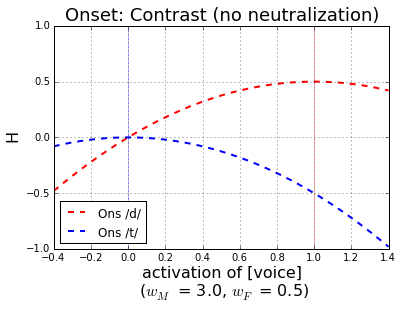

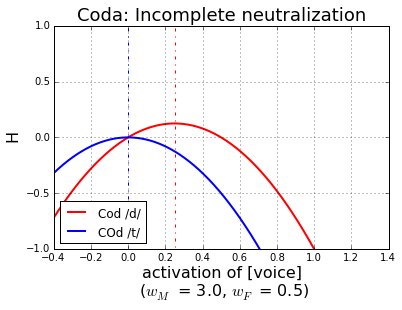

In [8]:
# Incomplete neutralization of obstruent-coda [voice]; "dutch"

w_M_dutch = 3.0     # markedness weight in Coda (in Onset, w_M = 0)
w_F_dutch = 0.5     # faithfulness weight
                    # above produces grammatical coda devoicing since w_M > w_F

agrid = np.linspace(-0.4, 1.4, 1000)                  # create a sequence of activation values: x-axis values for plotting 
hvals_d = h_voi(agrid, uf=1,  w_M=0, w_F=w_F_dutch)   # Harmony values in Onset when the underlying form is /+voice/ for C: /d/
hvals_t = h_voi(agrid, uf=-1, w_M=0, w_F=w_F_dutch)   # Harmony values when the underlying form is /-voice/ for C: /t/ 
#print(hvals1)
# Make a Harmony plot
plt.plot(agrid, hvals_d, label=r"Ons /d/", linewidth=2, color="red", linestyle="--")
plt.plot(agrid, hvals_t, label=r"Ons /t/", linewidth=2, color="blue", linestyle="--")
plt.title("Onset: Contrast (no neutralization)", fontsize=18)
plt.xlabel("activation of [voice]\n ($w_M$ = %.1f, $w_F$ = %.1f)" % (w_M_dutch, w_F_dutch), fontsize=16)
plt.ylabel("H", fontsize=16)
plt.ylim(-1, 1)      
plt.legend(loc=3)
plt.grid()
ons_d_max = 1
ons_t_max = 0
plt.plot([ons_d_max, ons_d_max], [-10, 10], linewidth=1, color="red", linestyle=":")
plt.plot([ons_t_max, ons_t_max], [-10, 10], linewidth=1, color="blue", linestyle=":")
plt.show()                                            #comment out this line to get a single plot with 4 curves

agrid = np.linspace(-0.4, 1.4, 1000)                          # create a sequence of activation values: x-axis values for plotting 
hvals_d = h_voi(agrid, uf=1,  w_M=w_M_dutch, w_F=w_F_dutch)   # Harmony values in Onset when the underlying form is /+voice/ for C: /d/
hvals_t = h_voi(agrid, uf=-1, w_M=w_M_dutch, w_F=w_F_dutch)   # Harmony values when the underlying form is /-voice/ for C: /t/ 
#print(hvals1)
# Make a Harmony plot

plt.plot(agrid, hvals_d, label=r"Cod /d/", linewidth=2, color="red")
plt.plot(agrid, hvals_t, label=r"COd /t/", linewidth=2, color="blue")
plt.title("Coda: Incomplete neutralization", fontsize=18)
plt.xlabel("activation of [voice]\n ($w_M$ = %.1f, $w_F$ = %.1f)" % (w_M_dutch, w_F_dutch), fontsize=16)
plt.ylabel("H", fontsize=16)
plt.ylim(-1, 1)      
plt.legend(loc=3)
plt.grid()
cod_d_max = 0.25
cod_t_max = 0
plt.plot([cod_d_max, cod_d_max], [-10, 10], linewidth=1, color="red", linestyle="-.")
plt.plot([cod_t_max, cod_t_max], [-10, 10], linewidth=1, color="blue", linestyle="-.")
plt.show()

###Finding optima using canned algorithms
When we add Quantization Harmony, which is 4th order, it will be useful to appeal to canned numerical optimization algorithms to find total Harmony optima. When these algorithms provide *global* optima, those results are significant: they give the competence-theoretic predicted output values. 

But for temporal dynamics intended to model real-time internal psycholinguistic processing, we must wait for the GSC dynamics presented in Class 6.

In [9]:
# scipy.optimize = "optim" provides many algorithms for optimization and root finding. 
# see: http://docs.scipy.org/doc/scipy/reference/optimize.html

# Perform local optimization with minimize(). 
# This optimization algorithm tries to minimize (not maximize) a function. 
# So let us find a (local) minimum of NEGATIVE Harmony instead of a maximum of Harmony.
# The algorithm finds a LOCAL minimum. May need to run it multiple times with different random initial guesses.
initial_guess_1 = -1
res_d = optim.minimize(lambda x: -h_voi(x, 1, w_M_dutch, w_F_dutch), initial_guess_1)      # (lambda x: ...) is an unnamed function of x;  
                                # use of w_M_dutch means we consider Coda position; uf = 1 i.e. /+voice/: /d/; res[ult]_d is an object 
#print(res_d)
print("Considering an obstruent surfacing in Coda position")
print("Total Harmony for /d/ (red)  is maximal (%.3f) at a = %.3f" % (-res_d.fun, res_d.x))
# res.x is the value of argument a at which Harmony is maximal.
# res.fun contains the value of the function at the local minimum found by optim.minimize() 
# -res.fun is the value of the local maximum of Harmony.
# In this case, the algorithm found a global optimum: there is only one optimum
res_t = optim.minimize(lambda x: -h_voi(x, -1, w_M_dutch, w_F_dutch), initial_guess_1)      # here uf = -1 i.e. /-voice/: /t/
#print(res_t)
print("Total Harmony for /t/ (blue) is maximal (%.3f) at a = %.3f" % (-res_t.fun, res_t.x))
print("Note that the optimal a value for /d/ is now < 1  -->  neutralization")
print("Note that the optimal a value for /t/ is 0, for /d/ is > 0  --> Incomplete neutralization!")

Considering an obstruent surfacing in Coda position
Total Harmony for /d/ (red)  is maximal (0.125) at a = 0.250
Total Harmony for /t/ (blue) is maximal (-0.000) at a = 0.000
Note that the optimal a value for /d/ is now < 1  -->  neutralization
Note that the optimal a value for /t/ is 0, for /d/ is > 0  --> Incomplete neutralization!


<font; color=red>
**Homework Exercise 3-2.** What happens if we increase the Markedness weight $w_M$?